In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map


sns.set_theme()


# Grid Environments

Initialize and explore three Frozen Lake environments (4x4, 6x6, 8x8).

### 4x4 Environment

Observation space (states): Discrete(16)
Action space: Discrete(4)
Specs:  EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4', 'is_slippery': True, 'render_mode': 'rgb_array', 'desc': ['SFFF', 'FFHF', 'FFFF', 'FFFG']}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)


FrozenLake 4x4 Map:
S F F F
F F H F
F F F F
F F F G


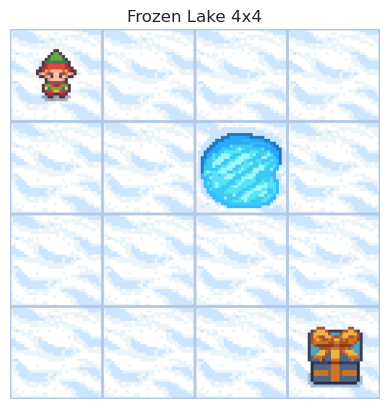

In [299]:
env_4 = gym.make(
        "FrozenLake-v1",
        is_slippery = True,
        render_mode ="rgb_array",
        desc = generate_random_map(
            size = 4, p = 0.9, seed = 123
        ),
    )
print("Observation space (states):", env_4.observation_space)
print("Action space:", env_4.action_space)
print("Specs: ", env_4.spec)

map_desc = env_4.unwrapped.desc 
map_str = [[cell.decode('utf-8') if isinstance(cell, bytes) else cell for cell in row] for row in map_desc]

print("\n\nFrozenLake 4x4 Map:")
for row in map_str:
    print(' '.join(row))


env_4.reset()
plt.imshow(env_4.render())
plt.axis("off")
plt.title("Frozen Lake 4x4")
plt.show()


### 6x6 Environment

Observation space (states): Discrete(36)
Action space: Discrete(4)
Specs:  EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4', 'is_slippery': True, 'render_mode': 'rgb_array', 'desc': ['SFFFFF', 'HFFFFF', 'FFFFHF', 'FFFFFF', 'FFFFHF', 'HFFFFG']}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)


FrozenLake 6x6 Map:
S F F F F F
H F F F F F
F F F F H F
F F F F F F
F F F F H F
H F F F F G


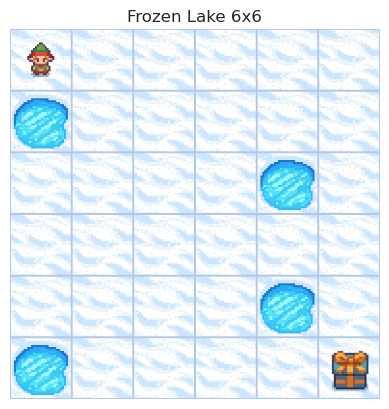

In [300]:
env_6 = gym.make(
        "FrozenLake-v1",
        is_slippery = True,
        render_mode = "rgb_array",
        desc = generate_random_map(
            size = 6, p = 0.9, seed = 123
        ),
    )
print("Observation space (states):", env_6.observation_space)
print("Action space:", env_6.action_space)
print("Specs: ", env_6.spec)

map_desc = env_6.unwrapped.desc 
map_str = [[cell.decode('utf-8') if isinstance(cell, bytes) else cell for cell in row] for row in map_desc]

print("\n\nFrozenLake 6x6 Map:")
for row in map_str:
    print(' '.join(row))


env_6.reset()
plt.imshow(env_6.render())
plt.axis("off")
plt.title("Frozen Lake 6x6")
plt.show()


### 8x8 Environment

Observation space (states): Discrete(64)
Action space: Discrete(4)
Specs:  EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4', 'is_slippery': True, 'render_mode': 'rgb_array', 'desc': ['SFFFFFHF', 'FFFFFFFF', 'HFFFFFFF', 'FFFFHFHF', 'FFFFFFFF', 'FFFFFFFF', 'FFFFFFFF', 'FFFFFFFG']}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)


FrozenLake 8x8 Map:
S F F F F F H F
F F F F F F F F
H F F F F F F F
F F F F H F H F
F F F F F F F F
F F F F F F F F
F F F F F F F F
F F F F F F F G


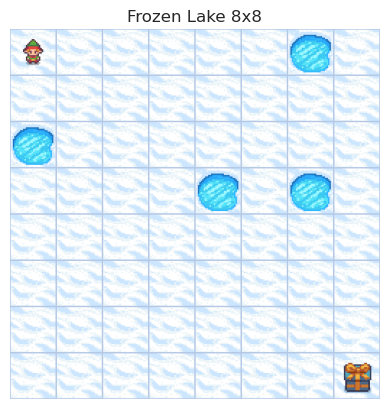

In [301]:
env_8 = gym.make(
        "FrozenLake-v1",
        is_slippery = True,
        render_mode = "rgb_array",
        desc = generate_random_map(
            size = 8 , p = 0.9, seed = 123
        ),
    )
print("Observation space (states):", env_8.observation_space)
print("Action space:", env_8.action_space)
print("Specs: ", env_8.spec)

map_desc = env_8.unwrapped.desc 
map_str = [[cell.decode('utf-8') if isinstance(cell, bytes) else cell for cell in row] for row in map_desc]

print("\n\nFrozenLake 8x8 Map:")
for row in map_str:
    print(' '.join(row))


env_8.reset()
plt.imshow(env_8.render())
plt.axis("off")
plt.title("Frozen Lake 8x8")
plt.show()


# Reinforcement Learning

Implement a reinforcement learning algorithm:
- A warehouse robot navigates an environment with hazards and slippery surface.
- It must learn to avoid hazards.
- Use FrozenLake-v1 to model the environment


In [325]:
class WarehouseRobot:
    """
    Implements a warehouse robot learning how to navigate an environment with hazards and slippery surface.
    """

    def __init__(self, learning_rate, discount_factor, epsilon_init, epsilon_decay, epsilon_final, env, learning = "Q Learning"):
        """
        Initialize a warehouse robot instance.

        :param learning_rate: Learning rate for updating Q values.

        :param discount_factor: Discount factor for future rewards. 
                                Value between 0 and 1. 
                                Closer to 0: prioritize immediate rewards.
                                Closer to 1: proritize distant future rewards.

        :param epsilon_init: Initial epsilon value. Represents exploration probability.
        :param epsilon_decay: Rate at which epsilon decays per each episode.
        :param epsilon_final: Minimal value of epsilon.

        :param env: The environment of the robot.

        :param learning: Controls the type of learning.
                        Off-policy: "Q Learning".
                        On policy: "SARSA".
                        Default value is "Q learning".
        """

        self.learning_rate = learning_rate 
        self.discount_factor = discount_factor

        self.epsilon = epsilon_init
        self.epsilon_decay = epsilon_decay
        self.epsilon_final = epsilon_final
        
        self.env = env
        self.state_size =  self.env.observation_space.n # State size is the number of states: area of the environment (e.g. 16 for 4x4 environment)
        self.action_size = self.env.action_space.n # Action size is the number of actions (4 actions: move left, move down, move right, move up)

        self.reset_qtable() # Reset q table

        self.learning = learning # Type of learning (on or off policy)
    
    def reset_qtable(self):
        """
        Resets the q table to 0 in every cell. 

        Q table represents the expected rewards for each (state, action) pair. 
        """

        self.qtable = np.zeros((self.state_size, self.action_size)) # Size: (Number of possible states, number of possible actions)

    def get_action(self, state, rng):
        """
        Choose an action for the current environment state, with an epsilon greedy policy:
            - With probability epsilon, pick a random action (exploration).
            - Otherwise pick an action with highest Q value. 
        
        :param state: Current state of the environment.
        :param rng: Random number generator.
        """

        p = rng.uniform(0, 1) 
        
        if p < self.epsilon:
            action = self.env.action_space.sample() # exploration 
        else:
            # pick a random action from the ones which maximize future rewards
            max_ids = np.where(self.qtable[state, :] == max(self.qtable[state, :]))[0]
            action = rng.choice(max_ids) # exploitation
        
        return action
    
    def decay_epsilon(self):
        """
        Decay epsilon after each episode. 
            - High epsilon: more exploration.
            - Low epsilon: more exploitation.
        Algorithm starts with higher epsilon for more exploration, and gradually reduces it.
        """

        self.epsilon = max(self.epsilon_final, self.epsilon - self.epsilon_decay) # Makes sure epsilon doesn't go below a minimal value

    def update(self, state, action, reward, next_state, next_action = None):
        """
        Update the Q values in the Q table using one of two policies: Q learning or SARSA:

        Q-Learning:
            - Off policy learning: update Q values using maximum possible reward in the next state.
            - Update rule: Q(s,a) = Q(s,a) + alpha*(r + gamma*max Q(s',a') - Q(s,a))
                Where 
                    - Q(s,a): current Q value for (state, action) pair
                    - alpha: learning rate
                    - r: immediate reward received
                    - gamma: discout factor for future rewards
                    - max Q(s',a'): maximum expected reward in the next state
            - Q Learning: off policy. Updates Q values using the maximum possible reward from the next state. 
        
        SARSA: 
            - On policy learning: update Q values based on the robot's next state and action.
            - Update rule: Q(s,a) = Q(s,a) + alpha*(r + gamma*Q(s',a') - Q(s, a))
                Where
                    - Q(s,a): current Q value for (state, action) pair
                    - alpha: learning rate
                    - r: immediate reward received
                    - gamma: discout factor for future rewards
                    - Q(s',a'): Q value for the (next state, next action) pair

        :param state: Current state of the environment.
        :param action: Action taken by the robot in the current state.
        :param reward: Immediate reward received after taking action.
        :param next_state: Next environment state resulting from current action (move).
        :param next_action: Next action in next state. Used only for SARSA.  Default value is None.

        """

        if self.learning == "Q Learning":
            # Q Learning Update Rule: 
            # Q(s,a) = Q(s,a) + learning_rate * (r + discount_factor*max Q(s',a') - Q(s,a))

            delta = reward + self.discount_factor * np.max(self.qtable[next_state, :]) - self.qtable[state, action]
            self.qtable[state, action] += self.learning_rate * delta

        else:
            # SARSA Update Rule: 
            # Q(s,a) = Q(s, a) + learning_rate * (r + discount_factor * Q(s', a') - Q(s, a))

            delta = reward + self.discount_factor * self.qtable[next_state, next_action] - self.qtable[state, action]
            self.qtable[state, action] += self.learning_rate * delta

    def run(self, episodes, rng):
        """
        Runs the reinforcement learning algorithm for a number of episodes.

        :param episodes: Number of episodes.
        :param rng: Random number generator.
        """

        self.rewards = [] # Initialize rewards over episodes with empty list
        self.steps = [] # Initialize steps over episodes with empty list
        self.all_states = [] # Initialize all states over episodes with empty list
        self.all_actions = [] # Initialize all actions taken by robot over episodes with empty list
        self.qtables = [] # Initialize empty list for q tables

        for _ in range(episodes): # Loop through episodes


            state = self.env.reset(seed = 123)[0] # Reset environment each episode
            
            step = 0 # No current steps, initialize with 0
            total_reward = 0 # No current reward, initialize with 0 
            
            done = False # Boolean indicating if episode is over. Becomes True when goal or hazard is reached 


            while not done:

                action = self.get_action(state = state, rng = rng) # Get action in current state 
                self.all_states.append(state) # Append current state 
                self.all_actions.append(action) # Append current action

                next_state, reward, terminated, truncated, _ = self.env.step(action) # Execute action

                done = terminated or truncated # Check if episode ended

                # Update Q values
                if self.learning == "Q Learning":
                    self.update(state=state, action=action, reward=reward, next_state=next_state)
                else: # SARSA
                    next_action = self.get_action(state = next_state, rng = rng)
                    self.update(state=state, action=action, reward=reward, next_state=next_state, next_action=next_action)
                    action = next_action 
                
                total_reward += reward # Add reward to total reward

                step += 1 # Increase steps

                state = next_state # Move to the next state
            
            self.rewards.append(total_reward) 
            self.steps.append(step)

            self.decay_epsilon() # Decay epsilon after each episode
            
        self.qtables.append(self.qtable)






# Run Q Learning Algorithm

In [326]:
## Set the random seed for reproducibility
seed = 123
rng = np.random.default_rng(seed = seed) # Random number generator with fixed seed

In [327]:
# Helper Function 

def run_algorithm(env, learning_rate, discount_factor, epsilon_init, epsilon_decay, epsilon_final, n_runs = 20, episodes_num = 1000, learning = "Q Learning"):
    """
    Run the algorithm over multiple runs.

    

    :param env: The environment in which the robot learns (4x4, 6x6, 8x8).
    :param learning_rate: Learning rate for updating Q values.
    :param discount_factor: Discount factor for future rewards. 
                                Value between 0 and 1. 
                                Closer to 0: prioritize immediate rewards.
                                Closer to 1: proritize distant future rewards.
    
    :param epsilon_init: Initial epsilon value. Represents exploration probability.
    :param epsilon_decay: Rate at which epsilon decays per each episode.
    :param epsilon_final: Minimal value of epsilon.
    
    :param n_runs: Number of runs to average results. Default value set to 20.
    :param episodes_num: Number of episodes in one run. Default value set to 1000.

    :param learning: Type of learning algorithm. Default set to "Q Learning".

    

    :return all_runs: Dictionary containing run results.
    """
    

    all_runs = [] # Initialize results over all runs with empty list


    for run in range(n_runs):
        # Initialize robot instance
        robot = WarehouseRobot(learning_rate = learning_rate, 
                               discount_factor = discount_factor, 
                               epsilon_init = epsilon_init, 
                               epsilon_decay = epsilon_decay,
                               epsilon_final = epsilon_final,
                               env = env,
                               learning = learning)
        
        robot.run(episodes = episodes_num, rng=rng) # Run the algorithm

        # Append results for all runs 
        run_result = {
            "run": run,
            "rewards": robot.rewards,
            "steps": robot.steps,
            "episodes": episodes_num,
            "qtables": robot.qtables,
            "actions": robot.all_actions,
            "states": robot.all_states
        }
        all_runs.append(run_result)
    
    return all_runs # Return results over all runs


In [328]:
# Helper Function to plot rewards

def plot_rewards(all_runs_results):
    """
    Plots the mean cumulative rewards over multiple runs.

    :param all_runs_results: Dictionary of results over multuple runs. Contains a "rewards" key.
    """


    rewards_array = np.array([run['rewards'] for run in all_runs_results]) # Convert rewards from dictionary to numpy array

    cumsum_rewards = np.cumsum(rewards_array, axis = 1) # Cumulative sum along episodes axis

    # Mean and standard deviation for cumulative rewards for each episode
    mean_reward = cumsum_rewards.mean(axis = 0)
    std_reward = cumsum_rewards.std(axis=0)

    # Plot figure
    plt.figure(figsize=(9, 9))
    plt.plot(mean_reward, label = "Mean Cumulative Rewards", color = "blue")
    plt.fill_between(range(len(mean_reward)),
                    mean_reward - std_reward,
                    mean_reward + std_reward,
                    alpha = 0.2, 
                    color="blue", 
                    label = "Standard Deviation"
                    )
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Rewards")
    plt.title("Mean Cumulative Rewards Across Runs")
    plt.legend()
    plt.show()

In [329]:
# Helper Function to plot Steps

def plot_steps(all_runs_results):
    """
    Plots the steps over multiple runs.

    :param all_runs_results: Dictionary of results over multuple runs. Contains a "steps" key.
    """

    steps_array = np.array([run['steps'] for run in all_runs_results]) # Convert steps into numpy array

    # Mean and standard deviation of no. of steps for each episode
    mean_steps = steps_array.mean(axis=0) 
    std_steps = steps_array.std(axis=0) 


    # Plot figure
    plt.figure(figsize=(10, 7))
    plt.plot(mean_steps, label="Mean Steps per Episode", color='red')
    plt.fill_between(range(len(mean_steps)),
                    mean_steps - std_steps,
                    mean_steps + std_steps,
                    color="red", 
                    alpha=0.2, 
                    label="Standard Deviation")
    
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.title("Mean Steps per Episode Across Runs")
    plt.legend()
    plt.show()


In [330]:
# Helper Function to plot states and actions distribution

def plot_state_action_dist(all_runs_results):
    """
    Plot the distribution of states and actions across runs.
    
    :param all_runs_results: Dictionary of results over multuple runs. Contains the keys "states" and "actions".

    """

    all_states = [s for run in all_runs_results for s in run["states"]] # Flatten all states across runs

    all_actions = [a for run in all_runs_results for a in run["actions"]] # Flatten all actions across runs
    
    # Plot states distribution
    plt.figure(figsize=(7, 5))
    sns.histplot(all_states, kde=True)
    plt.title("States")
    plt.show()

    action_labels = {"Move Left": 0, "Move Down": 1, "Move Right": 2, "Move Up": 3} # Action Labels

    # Plot actions distribution
    plt.figure(figsize=(7, 5))
    sns.histplot(all_actions, kde=False)
    plt.xticks(ticks = list(action_labels.values()), labels = action_labels.keys())
    plt.title("Actions")
    plt.show()


In [332]:
# Helper function to map q values to directions

def q_directions(qtable, env_size):
    """
    Convert Q table into format that can be used for visualization.

    :param qtable: Q table.
    :param env_size: Environment size (e.g. 4 for 4x4 environment).

    :return qval_max: Max Q values.
    :return qtable directions: Arrows showing best action.

    """
    
    
    qval_max = qtable.max(axis=1).reshape(env_size, env_size)

    # Map action to arrow 
    directions_map = {
        0: "←",
        1: "↓",
        2: "→",
        3: "↑",
    }

    best_action = np.argmax(qtable, axis = 1).reshape(env_size, env_size)
    qtable_directions = np.empty(best_action.flatten().shape, dtype=str)

    for idx, best_val in enumerate(best_action.flatten()):
        if qval_max.flatten()[idx] > 0:
            qtable_directions[idx] = directions_map[best_val]
    qtable_directions = qtable_directions.reshape(env_size, env_size)
    
    return qval_max, qtable_directions


def plot_qval_map(all_runs_results, env):
    """

    Plot the environment in the final state and the learned Q values as a heatmap with best actions.

    :param all_runs_results: Dictionary of results over multuple runs. Contains the keys "states" and "actions".
    :param env: Current environment.

    """
    

    avg_qtable = np.mean([run["qtables"][-1] for run in all_runs_results], axis=0) # Average q table values

    state_size = env.observation_space.n # State size: environment area (e.g. 16 for 4x4)
    env_size = int(np.sqrt(state_size)) # Get environment size (e.g. 4 for 4x4)

    qval_max, qtable_directions = q_directions(avg_qtable, env_size) # Get 

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5)) 

    axes[0].imshow(env_4.render())
    axes[0].axis("off")
    axes[0].set_title(f"Frozen Lake {env_size}x{env_size}")
   

    sns.heatmap(
        data = qval_max, 
        cmap = sns.color_palette("Blues", as_cmap=True),
        annot = qtable_directions,
        fmt = "", 
        xticklabels=[],
        yticklabels=[],
        linewidths=0.5,
        linecolor="black", 
        annot_kws={"fontsize": "xx-large"},
        ax=axes[1] 
    )
    # Make the spines black and visible
    for _, spine in axes[1].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")

    plt.title("Learned Q Values: Best actions")
    plt.show()





## Run for 4x4 Map

In [333]:
all_runs_4 = run_algorithm(
    env = env_4, 
    learning_rate = 0.3, 
    discount_factor=0.98, 
    epsilon_init = 0.5, 
    epsilon_decay = 0.002, 
    epsilon_final = 0.01, 
    n_runs = 20, 
    episodes_num = 5000
    )

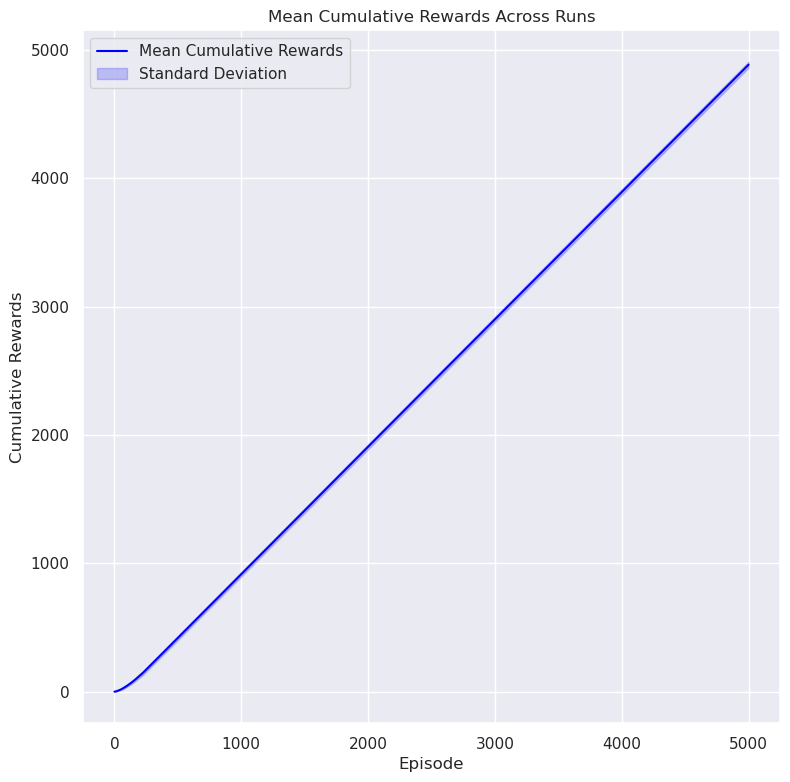

In [334]:
plot_rewards(all_runs_4)

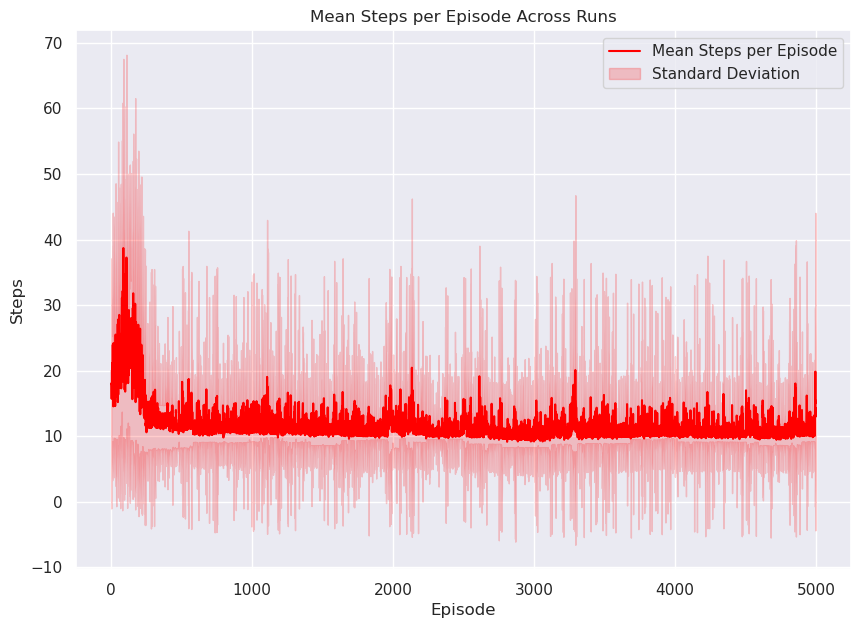

In [335]:
plot_steps(all_runs_4)

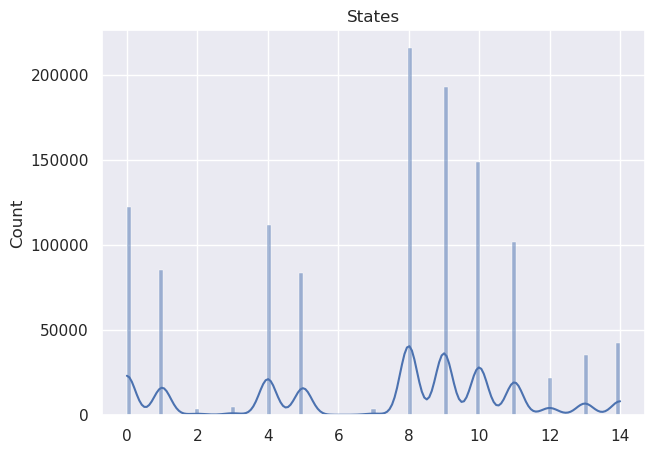

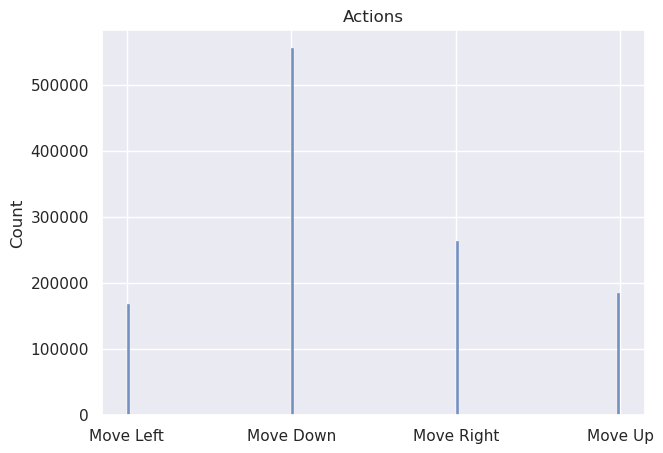

In [336]:
plot_state_action_dist(all_runs_4)

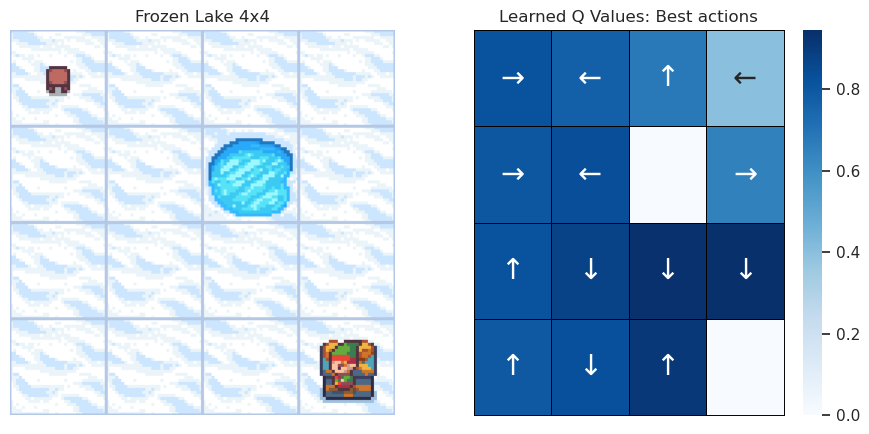

In [337]:
plot_qval_map(all_runs_4, env_4)